In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

In [2]:
!pip install gdown

You should consider upgrading via the '/home/dmitry/anaconda3/bin/python -m pip install --upgrade pip' command.


Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

!mkdir data !tar -xf inno_stats.tar.gz -C ./data

In [3]:
!gdown --id 13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu 



In [4]:
!mkdir data 
!tar -xf inno_stats.tar.gz -C ./data

mkdir: невозможно создать каталог «data»: Файл существует


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [6]:
g_10 = pd.read_csv('./data/10_groups.csv')
g_10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-10-01 20:22:55,2035558,0.0,1636749,52,339,1.0,107.90,0,10004
1,2020-10-01 20:54:12,13037327,0.0,267261,52,339,1.0,80.04,0,10004
2,2020-10-01 21:25:59,1430590,0.0,1331395,61,379,1.0,31.92,1,10091
3,2020-10-01 13:31:01,3504660,0.0,641525,61,97,1.0,55.98,0,10091
4,2020-10-01 16:32:06,11024438,0.0,1325852,61,97,4.0,176.00,0,10091


In [7]:
g_11 = pd.read_csv('./data/11_groups.csv')
g_11.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-11-01 15:29:01,3121751,0.0,332351,52,271,1.0,107.98,0,10004
1,2020-11-01 12:41:10,22047017,8293317.0,1875438,52,-9999,1.0,108.00,0,10004
2,2020-11-01 13:17:09,6419825,0.0,563112,61,379,2.0,112.00,0,10091
3,2020-11-01 12:31:31,10284541,0.0,1841710,61,379,1.0,55.91,0,10091
4,2020-11-01 13:06:15,10424967,0.0,1304277,61,271,2.0,87.80,0,10091


In [8]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [9]:
bad_ids = pd.read_csv('bad_ids.csv')
bad_ids.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


In [10]:
df = g_9

In [11]:
df = df[~df.id_card.isin(bad_ids.id_card.values)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38466003 entries, 0 to 42100857
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   id_doc    int64  
 2   id_order  float64
 3   id_card   int64  
 4   id_tov    int64  
 5   id_kontr  int64  
 6   quantity  float64
 7   sum       float64
 8   is_green  int64  
 9   id_group  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.2+ GB


Number of samples decreasef from 42 100 858 to 38 466 003

## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

H0: buying discounted products DOES NOT depend on the average order sum

HA: buying discounted products DOES depend on the average order sum

In [12]:
from scipy.stats import ttest_ind

avg_sum = df.groupby('id_doc')['sum'].mean()
avg_disc = df.groupby('id_doc')['is_green'].count()

ttest_ind(avg_disc.values, avg_sum.values)

Ttest_indResult(statistic=-3678.842357621653, pvalue=0.0)

P-values is low, H<sub>0</sub> is rejected, 

So, discounted products DEPEND on the average order sum

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [13]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

recipts_per_day = df.groupby(df.date.dt.day)['id_doc'].count()

/home/dmitry/.local/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


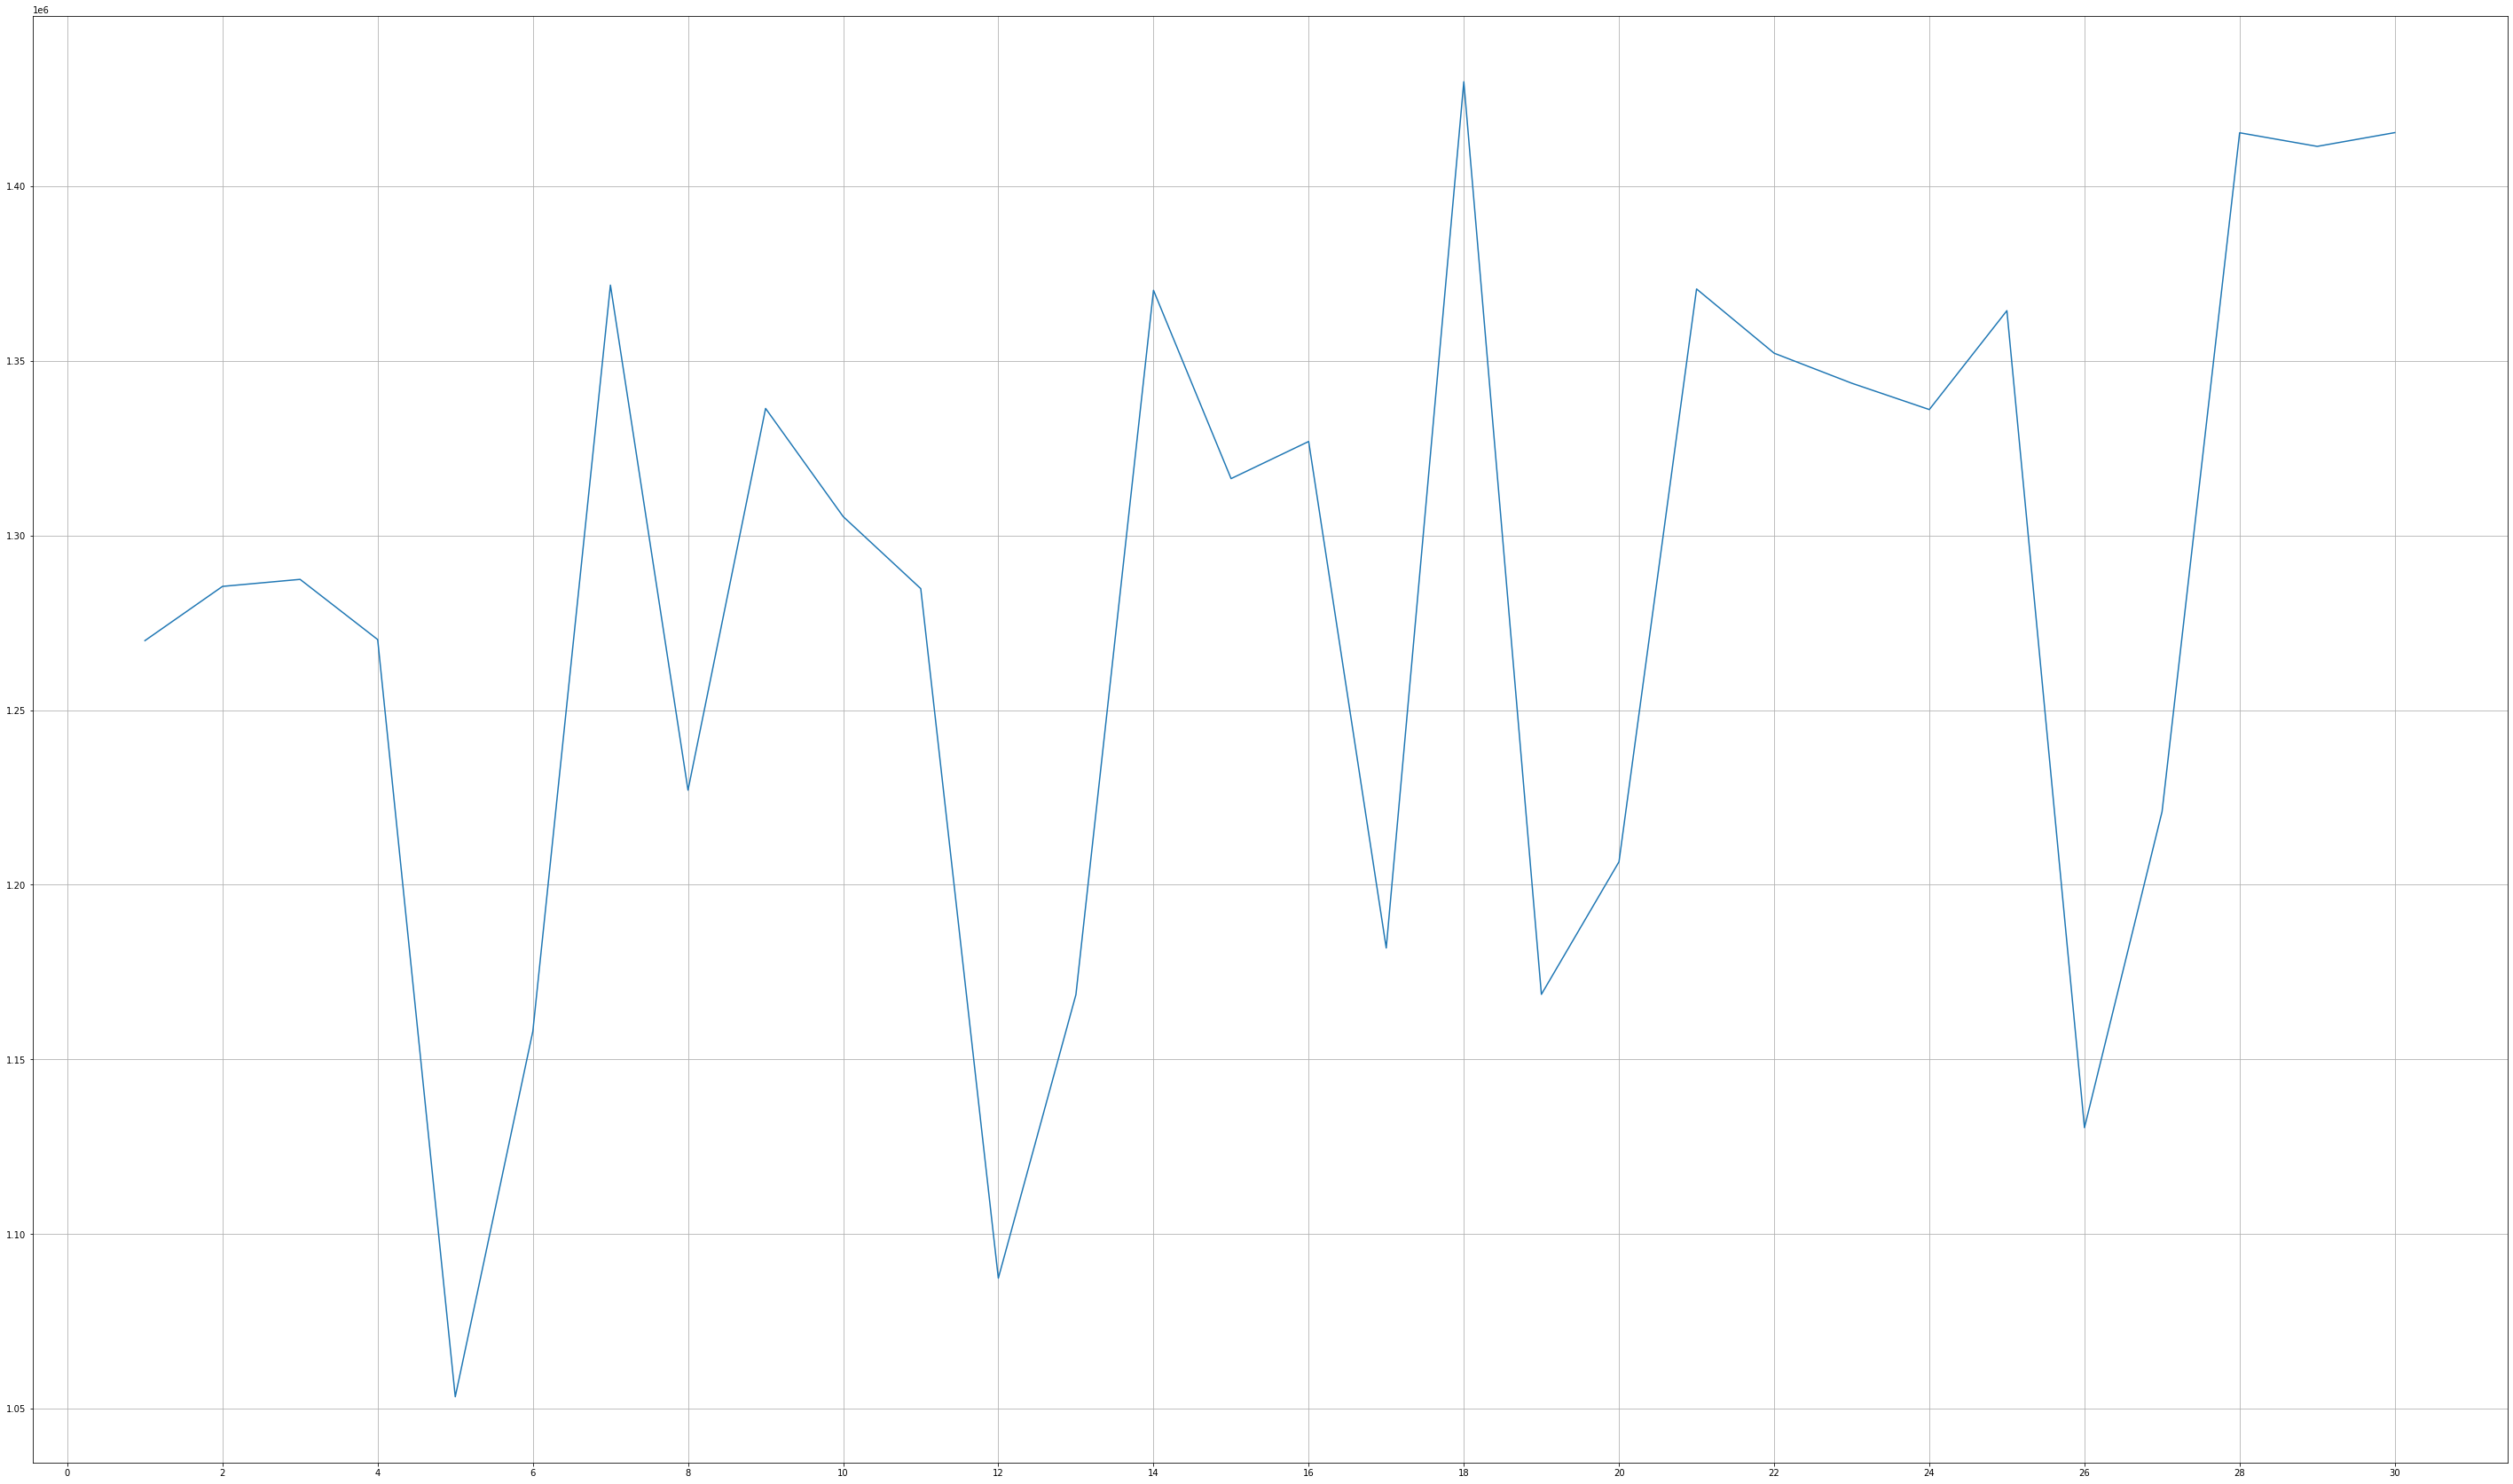

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
plt.locator_params(axis='x', nbins=31)
plt.grid()
plt.plot(recipts_per_day)

It is seen that local minimums are at days 5, 20 and 26. If we suggest that paydays are days 1-5 and 20-25 then we can see that before those days function decreases - rare buys. Also, function increases right after mentioned days -people buy more frequently. 

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Orders amount
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

### Frequent buyers

Text(0, 0.5, 'Number of purchases')

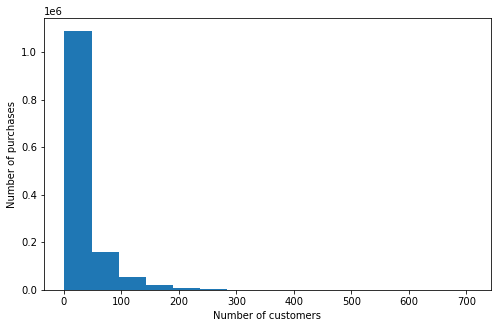

In [15]:
import matplotlib.pyplot as plt

receipt_count = df.groupby('id_card')['id_doc'].count()

plt.figure(figsize=(8, 5))
plt.hist(receipt_count, bins=15)
plt.xlabel('Number of customers')
plt.ylabel('Number of purchases')

Text(0, 0.5, 'Number of purchases')

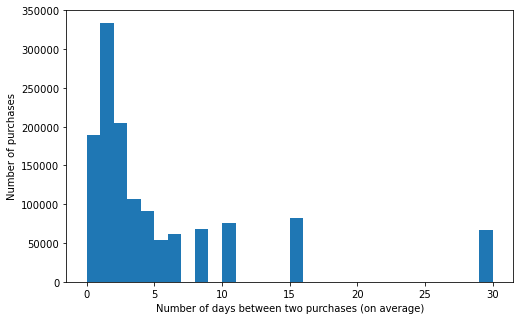

In [16]:
freq_reciepts = (1 / receipt_count[receipt_count > 0] * 30).round()

plt.figure(figsize=(8, 5))
plt.hist(freq_reciepts, bins=30)
plt.xlabel('Number of days between two purchases (on average)')
plt.ylabel('Number of purchases')

Most of people purchase every day. Some of them smth  buy every week

### Average purchase sum

In [17]:
purchase_sum = df.groupby('id_card')['sum'].sum()
purchase_sum.head()

id_card
0    3607.20
1     147.00
2    1485.00
3    4393.38
4    3905.12
Name: sum, dtype: float64

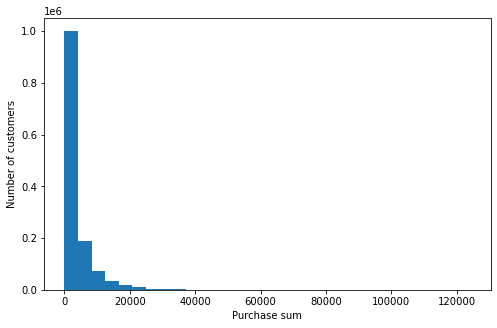

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.ylabel('Number of customers')
plt.xlabel('Purchase sum')
plt.hist(purchase_sum, bins=30);

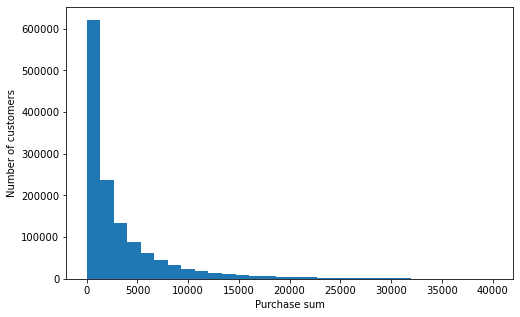

In [19]:
plt.figure(figsize=(8, 5))
plt.ylabel('Number of customers')
plt.xlabel('Purchase sum')
plt.hist(purchase_sum[purchase_sum < 40000], bins=30);

Most of the customers make purchases for less than 1000 rubles

## Orders amount

In [20]:
count = df.groupby(['id_card'])['id_doc'].count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48715fbe80>]],
      dtype=object)

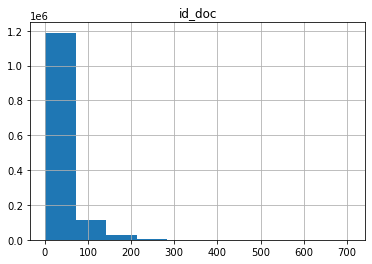

In [21]:
count.to_frame().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f487156ecd0>]],
      dtype=object)

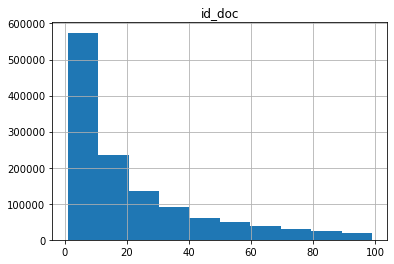

In [22]:
count[count<100].to_frame().hist()

We can see people that go really frequently and those who visit rare.

### Usual cart

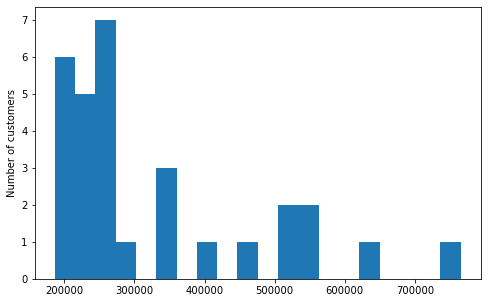

In [23]:
customers_per_group = df.groupby('id_group')['id_card'].unique().apply(len)

plt.figure(figsize=(8, 5))
plt.hist(customers_per_group.sort_values(ascending=False)[:30], bins=20)
plt.ylabel('Groups count')
plt.ylabel('Number of customers');

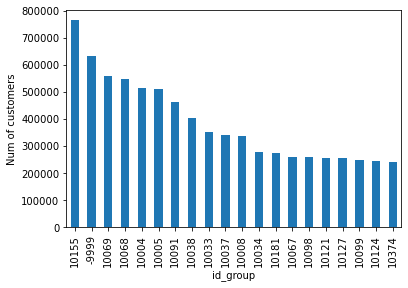

In [24]:
customers_per_group = df.groupby(by=['id_group'])['id_card'].unique().apply(len)
customers_per_group = customers_per_group.sort_values(ascending=False)
customers_per_group[:20].plot(kind='bar')

plt.ylabel('Num of customers');

In [25]:
sus_groups = p_g[p_g.id_group.isin(customers_per_group[:20].index)]
sus_groups.drop_duplicates('id_group', 'first', inplace=True)
sus_groups['occurence'] = customers_per_group[:20]
sus_groups.sort_values('occurence', ascending=False)
sus_groups[['id_group', 'name_group', 'occurence']].head()

<ipython-input-25-98ae94b28498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_groups.drop_duplicates('id_group', 'first', inplace=True)
<ipython-input-25-98ae94b28498>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_groups['occurence'] = customers_per_group[:20]


,id_group,name_group,occurence
0,10004,Кисломолочные продукты,NaN
43,10005,Творог,NaN
93,10008,"Торты, пирожные, муссы, суфле",NaN
960,10033,"Выпечка, печенье, вафли, пряники",NaN
1032,10034,"Леденцы, мармелад, халва, зефир, восточные сла...",NaN


"Кисломолочные продукты" wins